In [1]:
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS 
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from collections import Counter
import nltk, string
from nltk.corpus import stopwords
import spacy # you need to install the language model this way: python -m spacy download en_core_web_md

nlp = spacy.load("en_core_web_md")

stop = stopwords.words('english')

exclude = set(string.punctuation)

In [2]:
def get_closest_to_centroid(vectors,centroid):
    rank = [[x,cosine_similarity(centroid.reshape(1, -1),vectors[x].reshape(1, -1))[0][0]] for x in range(len(vectors))]
    rank.sort(key=lambda x: x[1],reverse=True)
    closest = rank[:3]
    return closest

def clean_text(text):
    text = text.lower()
    text = ''.join(ch for ch in text if ch not in exclude)
    text = [x for x in nltk.word_tokenize(text) if x not in stop]
    return text

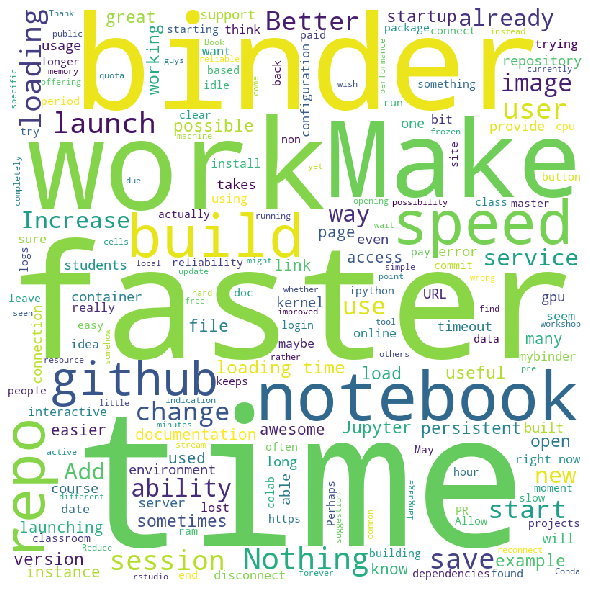

In [3]:
df = pd.read_csv("data/mybinder.org-user-survey-fed-2020.csv")

answer_embs = []

for index, row in df.iterrows():
    answer = row["If you could change one thing about Binder, what would it be?"]
    if type(answer) is str and len(answer)>3:
        answer_emb = nlp(answer).vector
        answer_embs.append([index,answer,answer_emb])
        
comment_words = " ".join([x[1] for x in answer_embs])

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 
  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()        

In [4]:
n_clusters = 10

X = np.array([x[2] for x in answer_embs])
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
clusters = {x: {"centroid": kmeans.cluster_centers_[x], "answers":[],"vectors":[]} for x in range(len(kmeans.cluster_centers_))}

for x in range(len(answer_embs)):
    answer = answer_embs[x][1]
    vector = answer_embs[x][2]
    label = kmeans.labels_[x]
    clusters[label]["answers"].append(answer)
    clusters[label]["vectors"].append(vector)

In [5]:
for cluster,infos in clusters.items():
    answers = infos["answers"]
    vectors = infos["vectors"]
    centroid = infos["centroid"]
    comment_words = [word for answer in answers for word in clean_text(answer)]
    most_common = Counter(comment_words).most_common(5)
    central_ids = get_closest_to_centroid(vectors,centroid)
    central_answers = [answers[id_[0]] for id_ in central_ids]
    for answ in central_answers:
        print (answ)
    print ("---> other",len(answers)-len(central_answers),"messages around the same topic")
    
    
#    for answ in answers:
#        print (answ)
    print (" ")

Documentation
An interactive configuration tool
---> other 0 messages around the same topic
 
just an idea -- i'd be willing to pay for a hosted service with more computer and such. ie jupyterhub. probably out of scope but i can wish because you guys do great work! :) binder i think is great because it's simple so i don't have other suggestions right now. 
I'm trying to read a notebook documenting floweaver. https://mybinder.org/v2/gh/ricklupton/floweaver/master?filepath=docs%2Ftutorials%2Fquickstart.ipynb It's very frustrating because if I leave it for a few minutes it disconnects, and won't reconnect. (eg switching to another tab for a while) So I would say, from my sample size of 1, that the basic functionality doesn't seem to work :-(
If it was possible to have the pre-built images launch faster, that would be awesome. Sometimes I wait 5-15 minutes for a binder instance to launch and then when I come to the binder instance, it has already expired. It's one barrier I have convincing